### 統計學習與深度學習 HW3
### 會計四 B06702064 林聖硯

### 第一題 [分類器、特徵建構、與Stacking]

#### Q1.1

In [74]:
%matplotlib inline
import matplotlib.pyplot as plt
import csv
import numpy as np

f = open('ds/namesex_data_v2.csv', 'r', encoding='utf8')
mydata = csv.DictReader(f)
sexlist = []
namelist = []
foldlist = []
for i, arow in enumerate(mydata):
    sexlist.append(int(arow['sex'].strip()))
    gname = arow['gname'].strip()
    namelist.append(gname)
    foldlist.append(int(arow['fold'].strip()))

sexlist = np.asarray(sexlist)
namelist = np.asarray(namelist)
foldlist = np.asarray(foldlist)
f.close()

In [75]:
import pandas as pd
name_df = pd.DataFrame({'sex': sexlist, 'name': namelist, 'fold': foldlist})
train_df = name_df[name_df['fold'] <= 6]

In [76]:
print("名字超過兩個字的有", sum(train_df['name'].apply(lambda x : len(x) > 2)), "人")
print("名字剛好是兩個字的有", sum(train_df['name'].apply(lambda x : len(x) == 2)), "人")
print("名字剛好是一個字的有", sum(train_df['name'].apply(lambda x : len(x) == 1)), "人")

名字超過兩個字的有 0 人
名字剛好是兩個字的有 7274 人
名字剛好是一個字的有 209 人


In [77]:
#把一個字的feature取出
train_df['word1'] = train_df['name'].apply(lambda x : x[0])
train_df['word2'] = train_df['name'].apply(lambda x : x[1] if (len(x) == 2) else '')

C:\Users\martin\.conda\envs\test\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\martin\.conda\envs\test\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [78]:
#每個column都取出unique values
temp_1 = train_df['word1'].value_counts()
temp_2 = train_df['word2'].value_counts()
temp_3 = train_df['name'].value_counts()

In [79]:
#一個字的feature合併計算出現次數
result = temp_1.add(temp_2, fill_value = 0)

In [80]:
#一個字的feature和兩個字的feature分別取出出現次數大於兩次後取交集
list_one = result[result >= 2].index.to_list()
list_two = temp_3[temp_3 >= 2].index.to_list()
set_one = set(list_one)
set_two = set(list_two)
set_result = set.union(set_one, set_two)
list_result = list(set_result)

In [81]:
print(list_result[:10])
print(len(list_result))

['', '宇晟', '鵬', '霏', '葳葳', '倢', '子軒', '品含', '宜謙', '仁']
1630


In [82]:
#總共出現兩次以上的feature
list_result = list_result[1:]

In [83]:
name_df['word1'] = name_df['name'].apply(lambda x : x[0])
name_df['word2'] = name_df['name'].apply(lambda x : x[1] if (len(x) == 2) else '')

In [84]:
name_df['word1_temp'] = name_df['word1'].apply(lambda x : x if x in list_result else '_Other_Feature_1')
name_df['word2_temp'] = name_df['word2'].apply(lambda x : x if x in list_result else '_Other_Feature_2')
name_df['name_temp'] = name_df['name'].apply(lambda x : x if x in list_result else '_Other_Feature_3')

In [13]:
name_df[:10]

,sex,name,fold,word1,word2,word1_temp,word2_temp,name_temp
0,1,承憲,9,承,憲,承,憲,承憲
1,1,均平,7,均,平,均,平,_Other_Feature_3
2,0,思安,6,思,安,思,安,_Other_Feature_3
3,1,佑誠,3,佑,誠,佑,誠,_Other_Feature_3
4,0,乃馨,0,乃,馨,乃,馨,_Other_Feature_3
5,0,婕,0,婕,,婕,_Other_Feature_2,婕
6,0,冠瑜,1,冠,瑜,冠,瑜,_Other_Feature_3
7,1,冠學,0,冠,學,冠,學,_Other_Feature_3
8,1,立翰,2,立,翰,立,翰,_Other_Feature_3
9,0,以柔,6,以,柔,以,柔,_Other_Feature_3


In [85]:
df_temp = pd.get_dummies(name_df[['word1_temp', 'word2_temp', 'name_temp']], prefix='', prefix_sep='')
data_final = pd.concat([name_df, df_temp], axis = 1)
data_final['_Other_Feature_'] = data_final[['_Other_Feature_1', '_Other_Feature_2', '_Other_Feature_3']].max(axis = 1)

In [86]:
#去除重複的column
data_final = data_final.groupby(data_final.columns, axis=1).sum()
data_final.drop(['word1', 'word2', 'word1_temp', 'word2_temp', 'name_temp', '_Other_Feature_1','_Other_Feature_2', '_Other_Feature_3'], axis = 1,inplace = True)

In [87]:
#rearrange the order of columns
cols = data_final.columns.tolist()
cols = cols[1:] + cols[:1]
data_final = data_final[cols]
data_final = data_final.set_index('name')

In [88]:
#同一個feature出現兩次只算一次
for col in data_final.columns:
    if col == 'fold':
        continue
    else:
        data_final[col] = data_final[col].apply(lambda x : 1 if x >= 1 else 0)

In [273]:
data_final

,fold,sex,一,上,上萱,世,丞,丞恩,丞蔚,中,...,鵬,麒,麒安,麗,麟,鼎,齊,齡,龍,_Other_Feature_
name,,,,,,,,,,,,,,,,,,,,,
承憲,9,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
均平,7,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
思安,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
佑誠,3,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
乃馨,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
嘉銘,3,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
佳芸,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
又華,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [89]:
train_data = data_final[data_final['fold'] <= 6]
valid_data = data_final[data_final['fold'] == 7]
stack_data = data_final[data_final['fold'] == 8]
test_data = data_final[data_final['fold'] == 9]

In [90]:
#被打亂後的column順序
#columns.difference會把otherfeature這個column拉到最前面
col = train_data[train_data.columns.difference(['sex', 'fold'])].columns

In [91]:
x_train = train_data[train_data.columns.difference(['sex', 'fold'])].to_numpy()
y_train = train_data['sex'].to_numpy()
x_valid = valid_data[train_data.columns.difference(['sex', 'fold'])].to_numpy()
y_valid = valid_data['sex'].to_numpy()
x_stack = stack_data[train_data.columns.difference(['sex', 'fold'])].to_numpy()
y_stack = stack_data['sex'].to_numpy()
x_test = test_data[train_data.columns.difference(['sex', 'fold'])].to_numpy()
y_test = test_data['sex'].to_numpy()

In [114]:
'''
x_train.shape = (7483, 1630)
x_valid.shape = (1110, 1630)
x_ensemble.shape = (1073, 1630)
x_test.shape = (1064, 1630)
'''
print('The shape of x_train is', x_train.shape)
print('The shape of y_train is', y_train.shape)
print('The shape of x_valid is', x_valid.shape)
print('The shape of y_valid is', y_valid.shape)
print('The shape of x_stack is', x_stack.shape)
print('The shape of y_stack is', y_stack.shape)
print('The shape of x_test is', x_test.shape)
print('The shape of y_test is', y_test.shape)

The shape of x_train is (7483, 1630)
The shape of y_train is (7483,)
The shape of x_valid is (1110, 1630)
The shape of y_valid is (1110,)
The shape of x_stack is (1073, 1630)
The shape of y_stack is (1073,)
The shape of x_test is (1064, 1630)
The shape of y_test is (1064,)


In [126]:
x_combine.shape

(8593, 1630)

#### Q1.2

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from pandas import DataFrame

In [94]:
regu_coef = np.geomspace(0.0001, 1000, 20)

In [95]:
#tuning hyperparameters:
best_f1 = 0
best_c = 0
for coef in regu_coef:
    clf_log = LogisticRegression(C = coef, max_iter = 1000).fit(x_train, y_train)
    y_pred = clf_log.predict(x_valid)
    f1 = f1_score(y_valid, y_pred)
    if (f1 > best_f1):
        best_c = coef
        best_f1 = f1
print('best coefficient is :', best_c)

best coefficient is : 78.47599703514607


In [110]:
#training
x_combine = np.concatenate((x_train, x_valid), axis = 0)
y_combine = np.concatenate((y_train, y_valid), axis = 0)
clf_log = LogisticRegression(C = best_c, max_iter=1000).fit(x_combine, y_combine)
y_pred = clf_log.predict(x_test)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print('===== Result : Logistic Regression with c =', best_c, '=====')
print('recall rate = ', recall)
print('precision rate = ', precision)
print('f1-score = ', f1)
print('accuracy = ', accuracy)

===== Result : Logistic Regression with c = 78.47599703514607 =====
recall rate =  0.893223819301848
precision rate =  0.8596837944664032
f1-score =  0.8761329305135951
accuracy =  0.8843984962406015


In [99]:
weights = np.array(clf_log.coef_[0])
weights_abs = np.abs(weights)
index = (-weights_abs).argsort()[:20]

In [102]:
print('Most important twenty features in Logistic Regression')
for i in index:
    print('{:<5}{}'.format(col[i], weights[i]))

Most important twenty features in Logistic Regression
傑    9.276482692904128
森    8.707686574199043
玲    -8.631117841160462
雯    -8.477282277642585
凌    -8.444691646047367
婷    -8.407085089833316
美    -8.298940949914135
萱    -8.294799913981338
鋒    8.224650753285193
薇    -8.210781121031747
妤    -8.195125683589627
婕    -8.151539957488664
綾    -8.135306808674942
潔    -8.029334230925866
嵐    -7.881176553339697
絃    -7.84293803194678
卉    -7.807494671622661
靜    -7.6537209736349014
松    7.617812638268883
蓉    -7.601023883013614


正向的重要性代表此特徵的性別傾向是男生，而負向則代表是女生，而從肉眼觀察正向的特徵的確在現實中通常對應到男生，負向的特徵也通常對應到女生，此模型表現確實不錯。另外，由評量指標可以看出，logistic regression的precision較高、recall較低，代表logistic regression在分類上傾向將男生分類正確。

#### Q1.3

In [103]:
from sklearn.ensemble import RandomForestClassifier

In [104]:
n_est = np.geomspace(5, 1000, 10)
n_est = np.round(n_est)
n_est = n_est.astype(int)

In [285]:
n_est

array([   5,    9,   16,   29,   53,   95,  171,  308,  555, 1000])

In [106]:
#tuning hyperparameters:
best_f1 = 0
best_nest = 0
for est in n_est:
    clf_RF = RandomForestClassifier(n_estimators = est).fit(x_train, y_train)
    y_pred = clf_RF.predict(x_valid)
    f1 = f1_score(y_valid, y_pred)
    if (f1 > best_f1):
        best_nest = est
        best_f1 = f1
print('best_nest is :', best_nest)

best_nest is : 16


In [111]:
#training
clf_RF = RandomForestClassifier(n_estimators = best_nest).fit(x_combine, y_combine)
y_pred = clf_RF.predict(x_test)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print('===== Result : Random Forest with n_est =', best_nest, '=====')
print('recall rate = ', recall)
print('precision rate = ', precision)
print('f1-score = ', f1)
print('accuracy = ', accuracy)

===== Result : Random Forest with n_est = 16 =====
recall rate =  0.837782340862423
precision rate =  0.8275862068965517
f1-score =  0.8326530612244898
accuracy =  0.8458646616541353


In [108]:
#The impurity-based feature importances.
importances = clf_RF.feature_importances_
index = (-importances).argsort()[:20]

In [109]:
print('Most important twenty features in Random Forest Classifier')
for i in index:
    print('{:<5}{}'.format(col[i], importances[i]))

Most important twenty features in Random Forest Classifier
妤    0.01937796141494247
翔    0.015199001207112118
萱    0.013362752515997299
婷    0.013181366098186811
柏    0.011943817785598802
怡    0.009899513100106994
哲    0.009534875883766995
承    0.009381741916034901
芷    0.009143881524634499
蓁    0.008963387957818389
柔    0.008955376513879837
佳    0.008551869371845733
雅    0.008531008492495298
晴    0.008504574399029621
宜    0.008386054409375704
涵    0.008173032668353194
庭    0.007771508296709946
芸    0.007577480801253776
瑄    0.0075673773199344645
瑜    0.007494788420169653


從肉眼觀察特徵，的確越重要的特徵可以越容易憑字來判斷是男生還是女生。另外，由評量指標可以看出，Random Forest 相較 logistic regression表現沒那麼好。而其結果recall較高、precision較低，在分類上傾向將男生分類正確。

#### Q1.4

In [112]:
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt

In [113]:
#lr = 0.1
lr = 0.1
clf_GBC_01 = GradientBoostingClassifier(n_estimators = 1500, learning_rate = lr).fit(x_train, y_train)

In [116]:
f1_list_1 = []
best_f1_1 = 0
best_stage_1 = 0
for i, y_pred in enumerate(clf_GBC_01.staged_predict(x_valid)):
    f1 = f1_score(y_valid, y_pred)
    f1_list_1.append(f1)
    if (f1 > best_f1_1):
        best_stage_1 = i + 1
        best_f1_1 = f1

when lr = 0.1, best_stage = 993 best_f1 = 0.9043639740018571




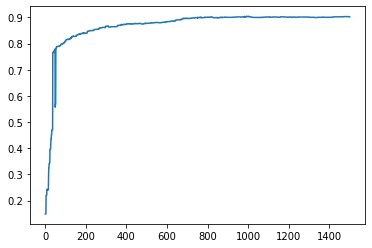

In [117]:
print("when lr = 0.1, best_stage =", best_stage_1, "best_f1 =", best_f1_1)
print('\n')
stages = np.linspace(1, 1500, 1500)
plt.plot(stages, f1_list_1)
plt.show()

In [118]:
#lr = 0.5
lr = 0.5
clf_GBC_05 = GradientBoostingClassifier(n_estimators = 1500, learning_rate = lr).fit(x_train, y_train)

In [119]:
f1_list_2 = []
best_f1_2 = 0
best_stage_2 = 0
for i, y_pred in enumerate(clf_GBC_05.staged_predict(x_valid)):
    f1 = f1_score(y_valid, y_pred)
    f1_list_2.append(f1)
    if (f1 > best_f1_2):
        best_stage_2 = i + 1
        best_f1_2 = f1

when lr = 0.5, best_stage = 237 best_f1 = 0.9050279329608938




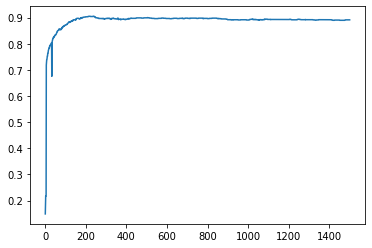

In [124]:
print("when lr = 0.5, best_stage =", best_stage_2, "best_f1 =", best_f1_2)
print('\n')
plt.plot(stages, f1_list_2)
plt.show()

In [121]:
#lr = 1
lr = 1
clf_GBC_1 = GradientBoostingClassifier(n_estimators = 1500, learning_rate = lr).fit(x_train, y_train)

In [122]:
f1_list_3 = []
best_f1_3 = 0
best_stage_3 = 0
for i, y_pred in enumerate(clf_GBC_1.staged_predict(x_valid)):
    f1 = f1_score(y_valid, y_pred)
    f1_list_3.append(f1)
    if (f1 > best_f1_3):
        best_stage_3 = i + 1
        best_f1_3 = f1

when lr = 1, best_stage = 135 best_f1 = 0.9012003693444137




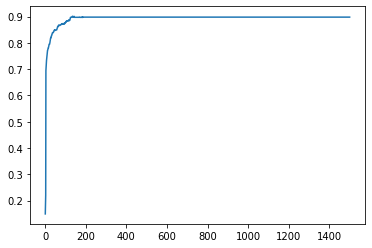

In [123]:
print("when lr = 1, best_stage =", best_stage_3, "best_f1 =", best_f1_3)
print('\n')
plt.plot(stages, f1_list_3)
plt.show()

In [127]:
#training
best_lr = 0.5
best_nstg = 237
clf_GBC_final = GradientBoostingClassifier(n_estimators = best_nstg, learning_rate = best_lr).fit(x_combine, y_combine)

In [128]:
y_pred = clf_GBC_final.predict(x_test)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print('===== Result : GBDT result with lr = 0.5, n_estimators = 237')
print('recall rate = ', recall)
print('precision rate = ', precision)
print('f1-score = ', f1)
print('accuracy = ', accuracy)
importances = clf_GBC_final.feature_importances_
index = (-importances).argsort()[:20]
print('Most important twenty features in Gradient Boosting Classifier')
for i in index:
    print('{:<5}{}'.format(col[i], importances[i]))

===== Result : GBDT result with lr = 0.5, n_estimators = 237
recall rate =  0.9034907597535934
precision rate =  0.8380952380952381
f1-score =  0.8695652173913043
accuracy =  0.8759398496240601
Most important twenty features in Gradient Boosting Classifier
妤    0.02974487907378084
翔    0.02148135825820101
柏    0.020259214074656386
萱    0.019846178581810224
婷    0.018812640099285093
哲    0.012882469978384683
蓁    0.012651727924359469
承    0.012490729670885421
怡    0.012126439484136997
晴    0.011783050821534037
柔    0.01123726427629005
宜    0.011202270004307634
佳    0.011202126414620796
雅    0.011085408050365994
涵    0.010913724497977883
芸    0.010662093697725993
芷    0.010586828795056244
瑜    0.010418592487687376
慈    0.010301419310479072
瑄    0.010007631588108025


從肉眼觀察特徵，此特徵結果與Random Forest差不多，的確越重要的特徵可以越容易憑字來判斷是男生還是女生。另外，由評量指標可以看出，GBDT相較前兩個分類器表現較好。而其結果recall較高、precision較低，在分類上傾向將男生分類正確

#### Q1.5

In [151]:
y_pred_logistic = clf_log.predict_proba(x_stack)
y_pred_RF = clf_RF.predict_proba(x_stack)
y_pred_GBC = clf_GBC_final.predict_proba(x_stack)

In [152]:
y_pred_logistic = y_pred_logistic[:, 1]
y_pred_RF = y_pred_RF[:, 1]
y_pred_GBC = y_pred_GBC[:, 1]

In [156]:
shape_feature = y_pred_logistic.shape[0]

In [157]:
x_stack_combine = np.concatenate([np.reshape(y_pred_logistic, (1, shape_feature)), np.reshape(y_pred_RF, (1,shape_feature))], axis = 0)
x_stack_combine = np.concatenate([x_stack_combine, np.reshape(y_pred_GBC, (1, shape_feature))], axis = 0)

In [158]:
#training data_X:是三個分類器個別輸出每一筆資料的機率
clf_stack = LogisticRegression(penalty = 'none', max_iter = 1000).fit(x_stack_combine.T, y_stack)

In [159]:
y_test_logistic = clf_log.predict_proba(x_test)
y_test_RF = clf_RF.predict_proba(x_test)
y_test_GBC = clf_GBC_final.predict_proba(x_test)

In [160]:
y_test_logistic = y_test_logistic[:, 1]
y_test_RF = y_test_RF[:, 1]
y_test_GBC = y_test_GBC[:, 1]

In [161]:
x_test_combine = np.concatenate([np.reshape(y_test_logistic, (1, 1064)), np.reshape(y_test_RF, (1, 1064))], axis = 0)
x_test_combine = np.concatenate([x_test_combine, np.reshape(y_test_GBC, (1, 1064))], axis = 0)

In [162]:
stack_pred = clf_stack.predict(x_test_combine.T)

In [173]:
recall = recall_score(y_test, stack_pred)
precision = precision_score(y_test, stack_pred)
f1 = f1_score(y_test, stack_pred)
accuracy = accuracy_score(y_test, stack_pred)
print('===== Result : Logistic Regression without penalty (meta learner) =====')
print('recall rate = ', recall)
print('precision rate = ', precision)
print('f1-score = ', f1)
print('accuracy = ', accuracy)
print('weak learner : Logistic Regression, weights =', clf_stack.coef_[0][0])
print('weak learner : Random Forest, weights =', clf_stack.coef_[0][1])
print('weak learner : GBDT, weights =', clf_stack.coef_[0][2])

===== Result : Logistic Regression without penalty (meta learner) =====
recall rate =  0.9014373716632443
precision rate =  0.8590998043052838
f1-score =  0.8797595190380761
accuracy =  0.8872180451127819
weak learner : Logistic Regression, weights = 2.5994484946723135
weak learner : Random Forest, weights = -0.36219559221433695
weak learner : GBDT, weights = 5.676682669579166


由以上結果可以看出，Weak Learner的係數大小依序為GBDT、Logistic Regression、Random Forest。這也剛好對應到上面的結果，Random Forest的分類結果最差，GBDT的分類別果最好，Logistic Regression次之；所以在meta learner內，分類器自然會給GBDT的output最高的權重。而從recall、precision、f1也可以看出meta learner的確有稍微改善weak learner的結果，顯示出meta learner有學到每個weak learner不足的地方。

## 第二題 [Data Visualization via Dimensionality Reduction]

In [432]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

stu_adm = pd.read_csv('ds/student_admission106.csv', encoding="utf-8", dtype=str)
uname = pd.read_csv('ds/univ_name106short1.csv', encoding="utf-8", dtype=str)

all_depid = stu_adm['department_id'].unique()
all_stuid = stu_adm['student_id'].unique()

ndepid = all_depid.shape[0]
nstuid = all_stuid.shape[0]
print("There are %d students and %d departments in total." % (nstuid, ndepid))

print("offers received by students:")
stu_adm.head(10)

There are 60461 students and 1976 departments in total.
offers received by students:


,school_id,department_id,student_id,student_name,state,location1,location2
0,001,001012,10246842,黃士玹,正1,南部,台南考區
1,001,001012,10042237,黃冠婷,正2,北部,台北考區
2,001,001012,10008031,鍾大方,正3,北部,台北考區
3,001,001012,10201525,曾信豪,正4,中部,彰化考區
4,001,001012,10014615,陳品儒,正5,北部,台北考區
5,001,001012,10294018,侯思筠,正6,東部,宜蘭考區
6,001,001012,10022810,吳悅慈,正7,北部,台北考區
7,001,001012,10236223,陳俞潔,正8,南部,台南考區
8,001,001012,10025909,蕭宇廷,正9,北部,台北考區
9,001,001012,10123708,吳岱軒,正10,北部,中壢考區


In [1]:
%matplotlib inline
import numpy as np
import pandas as pd

stu_adm = pd.read_csv('ds/student_admission106.csv', encoding="utf-8", dtype=str)
uname = pd.read_csv('ds/univ_name106short1.csv', encoding="utf-8", dtype=str)

all_depid = stu_adm['department_id'].unique()
all_stuid = stu_adm['student_id'].unique()

ndepid = all_depid.shape[0]
nstuid = all_stuid.shape[0]
print("In raw data, there are %d students and %d departments in total." % (nstuid, ndepid))

#construct the department-student matrix (i.e. array). 
dep_stu = np.zeros((ndepid, nstuid))
rowname = all_depid.copy()

depid_seq_map = dict()
for i in range(ndepid):
    depid_seq_map[all_depid[i]] = i

stuid_seq_map = dict()
for i in range(nstuid):
    stuid_seq_map[all_stuid[i]] = i

for cindex, row in stu_adm.iterrows():
    #print(cindex, row)
    dep_seq = depid_seq_map[row['department_id']]
    stu_seq = stuid_seq_map[row['student_id']]
    #print(dep_seq, stu_seq)
    dep_stu[dep_seq, stu_seq] = 1

#Remove very small departments.
min_stu_per_dep = 10
min_apply_dep_per_stu = 2

#remove small departments and single-application students. 
dep_apply_sum = np.sum(dep_stu, axis = 1)
keeprow = dep_apply_sum >= min_stu_per_dep
rowname = rowname[keeprow]
dep_stu2 = dep_stu[keeprow,:]
stu_apply_sum = np.sum(dep_stu2, axis = 0)
dep_stu2 = dep_stu2[:, stu_apply_sum >= min_apply_dep_per_stu]

#another run of filtering
dep_apply_sum = np.sum(dep_stu2, axis = 1)
dep_stu2 = dep_stu2[dep_apply_sum >= min_stu_per_dep,:]
rowname = rowname[dep_apply_sum >= min_stu_per_dep]
stu_apply_sum = np.sum(dep_stu2, axis = 0)
dep_stu2 = dep_stu2[:, stu_apply_sum >= min_apply_dep_per_stu]

#third run of filtering
dep_apply_sum = np.sum(dep_stu2, axis = 1)
dep_stu2 = dep_stu2[dep_apply_sum >= min_stu_per_dep,:]
rowname = rowname[dep_apply_sum >= min_stu_per_dep]

stu_apply_sum = np.sum(dep_stu2, axis = 0)
dep_stu2 = dep_stu2[:, stu_apply_sum >= min_apply_dep_per_stu]

#check to make sure the two conditions are satisfied. 
dep_apply_sum = np.sum(dep_stu2, axis = 1)
print("Number of department too small:", np.sum(dep_apply_sum < min_stu_per_dep))
stu_apply_sum = np.sum(dep_stu2, axis = 0)
print("Number of students applying only one department:", np.sum(stu_apply_sum <min_apply_dep_per_stu))

#now both conditions are satisfied.

In raw data, there are 60461 students and 1976 departments in total.
Number of department too small: 0
Number of students applying only one department: 0


In [2]:
uname['depname'] = uname.school_name_abbr + uname.department_name_abbr
uname2 = uname[['department_id', 'depname', 'category_name']].copy()
#this is for later use, to color data points. 
category_id, category_levels = pd.factorize(uname2.category_name)
#uname2['category_id'] = category_id / np.max(category_id)
uname2['category_id'] = category_id

#create a data frame for column name
colname_df = pd.DataFrame({'department_id': rowname})
colname_df = colname_df.merge(uname2, how = "left", on="department_id")

In [19]:
topdepid = np.argsort(dep_apply_sum)[::-1]
topn = 10
topdep = pd.DataFrame({'department_id': rowname[topdepid[0:topn]], 
                       'department_name': colname_df.depname.values[topdepid[0:topn]],
                       'num_applicant': dep_apply_sum[topdepid[0:topn]]
                       }) 
topdep

,department_id,department_name,num_applicant
0,008122,中原機械工程學,386.0
1,012052,中醫藥學,376.0
2,046032,銘傳會計（臺北）,367.0
3,004382,成大電機,357.0
4,005192,東吳企業管理,353.0
5,008112,中原土木,353.0
6,005182,東吳會計,351.0
7,015342,逢甲財金,340.0
8,045012,義守電機,339.0
9,046162,銘傳應用英語（桃園）,329.0


In [459]:
#各個學生對應的編號(raw:共60461位學生)
stuid_seq_map
#各個學系對應的編號(raw:共1976個學系)
depid_seq_map
#raw deparment-student matrix : (1976, 60641), matrix
dep_stu
#clean deparment-student matrix : (1917, 47386), matrix
dep_stu2
#各系資訊
uname
##depname:學校簡稱和學系簡稱合併

#sub-uname matrix
uname2
##category_id:每個category_name都encode到一個數字
###category_id: array, 數字
###level:object, 原本的category

#學生資訊
stu_adm

#dataframe:每一個系對應到的id, 名字, category, category_id
colname_df

#array:對應到排好順序的department_id
rowname

In [23]:
colname_df[:10]

,department_id,depname,category_name,category_id,TSNE_euc_dim1,TSNE_euc_dim2,TSNE_cos_dim1,TSNE_cos_dim2,TSNE_jac_dim1,TSNE_jac_dim2
0,001012,臺大中文,藝術及人文,1,-2.383070,2.446052,-74.712349,3.268354,61.827736,16.229977
1,001022,臺大外文,藝術及人文,1,-2.269596,0.129022,-81.012924,1.231775,66.120102,21.237907
2,001032,臺大歷史,藝術及人文,1,-2.526675,1.714994,-73.946663,4.121378,61.661739,15.039242
3,001042,臺大哲學,藝術及人文,1,-0.424474,0.799756,-72.841331,4.118471,60.891979,14.569609
4,001052,臺大人類學系,藝術及人文,1,-1.012165,1.532595,-74.146423,5.258345,62.442799,13.755514
5,001062,臺大圖書資訊,社會科學、新聞學及圖書資訊,2,-2.183424,0.276781,-78.230400,17.768061,64.659477,3.524336
6,001072,臺大日本語文,藝術及人文,1,-3.440107,0.447803,-77.112137,1.896502,62.919331,18.657942
7,001082,臺大戲劇,藝術及人文,1,-5.010280,1.140774,-73.106842,0.717205,57.856327,16.437437
8,001092,臺大數學,自然科學、數學及統計,4,-2.762604,3.594013,-64.371613,42.256432,72.341003,-33.324707
9,001102,臺大物理,自然科學、數學及統計,4,-1.924895,-0.435471,-67.654816,35.790569,73.784134,-26.439541


#### Q2.1

In [67]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [68]:
n_components = 8
random_state = 9527
pca = PCA(n_components = n_components,random_state = random_state)
#(1917, 8)
L = pca.fit_transform(dep_stu2)

In [180]:
pca.components_[0]

array([ 1.51510903e-04, -1.64807307e-04,  3.95069665e-05, ...,
       -4.22856534e-04, -5.61155880e-04, -5.61155880e-04])

In [69]:
colname_df['first_principal'] = L[:, 0]
colname_df['second_principal'] = L[:, 1]
colname_df['third_principal'] = L[:, 2]
colname_df['fourth_principal'] = L[:, 3]
colname_df['fifth_principal'] = L[:, 4]
colname_df['sixth_principal'] = L[:, 5]
colname_df['seventh_principal'] = L[:, 6]
colname_df['eighth_principal'] = L[:, 7]

In [175]:
L[:, 0].shape

(1917,)

In [91]:
#####color map#####
#1 藝術及人文:red
#3 商業、管理及法律:green
#6 工程、製造及營建:blue
#4 自然科學、數學及統計:yellow
#7 醫藥衛生及社會福利: grey
#2 社會科學、新聞學及圖書資訊:purple
#10 服務:black
#5 資訊通訊科技:pink
#0 教育:orange
#9 農業、林業、漁業及獸醫:brown
#8 其他:olive

In [9]:
id_to_category = {0 : '教育', 1: '藝術及人文', 2: '社會科學、新聞學及圖書資訊', 3:'商業、管理及法律', 4:'自然科學、數學及統計', 5:'資訊通訊科技', 6: '工程、製造及營建', 7:'醫藥衛生及社會福利', 8 :'其他', 9 : '農業、林業、漁業及獸醫', 10:'服務'}
colors_list = ['orange', 'red', 'purple', 'green', 'yellow', 'pink', 'blue', 'grey', 'olive', 'brown', 'black']

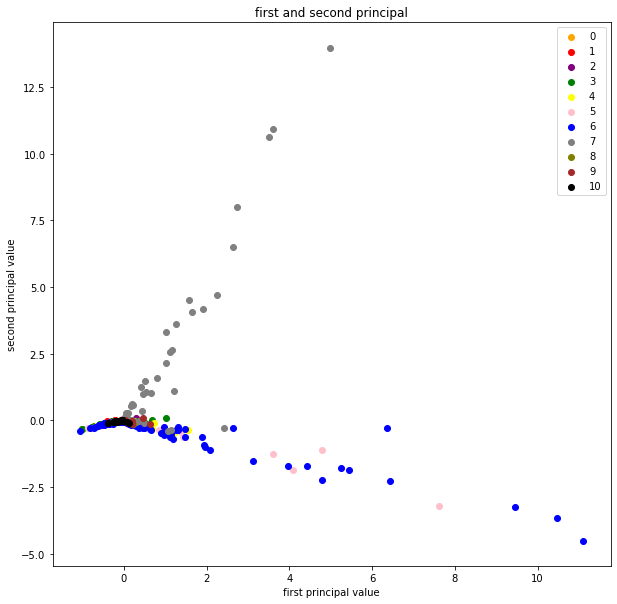

In [70]:
fig, ax = plt.subplots(figsize=(10, 10))
for key, _ in id_to_category.items():
    x = colname_df.loc[colname_df['category_id'] == key].first_principal
    y = colname_df.loc[colname_df['category_id'] == key].second_principal
    ax.scatter(x, y, label = key, color = colors_list[key])
plt.legend()
plt.title('first and second principal')
plt.xlabel('first principal value')
plt.ylabel('second principal value')
plt.show()

========================================================
<br>
從第一及第二主成分可以看出，第一主成分及第二主成分可以分出第六類(工程、製造及營建)及第七類(醫藥衛生及社會福利)的申請者。
<br>
========================================================

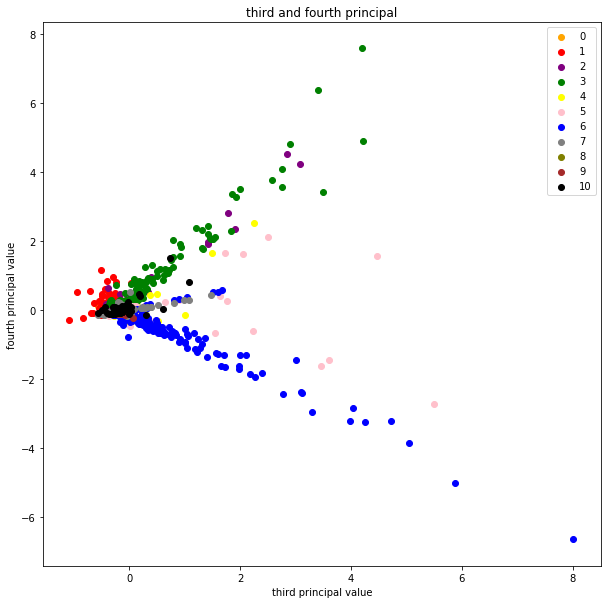

In [71]:
fig, ax = plt.subplots(figsize=(10, 10))
for key, _ in id_to_category.items():
    x = colname_df.loc[colname_df['category_id'] == key].third_principal
    y = colname_df.loc[colname_df['category_id'] == key].fourth_principal
    ax.scatter(x, y, label = key, color = colors_list[key])
plt.legend()
plt.title('third and fourth principal')
plt.xlabel('third principal value')
plt.ylabel('fourth principal value')
plt.show()

========================================================
<br>
從第三及第四主成分可以看出，第三主成分及第四主成分可以分出第六類(工程、製造及營建)及第三類(商業、管理及法律)的申請者。
<br>
========================================================

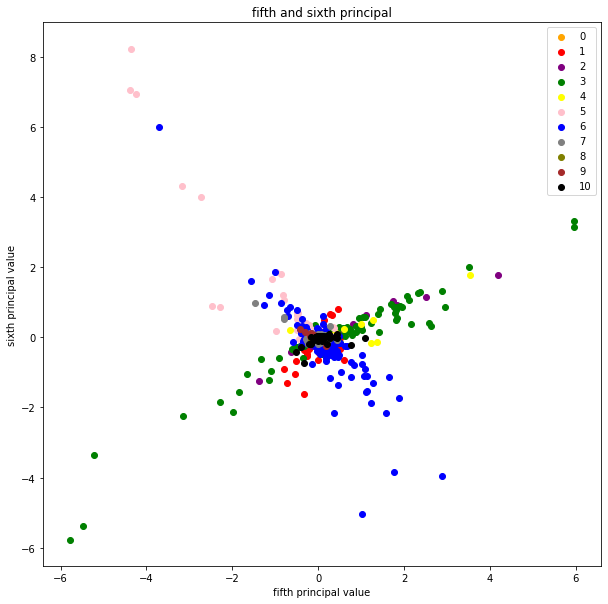

In [72]:
fig, ax = plt.subplots(figsize=(10, 10))
for key, _ in id_to_category.items():
    x = colname_df.loc[colname_df['category_id'] == key].fifth_principal
    y = colname_df.loc[colname_df['category_id'] == key].sixth_principal
    ax.scatter(x, y, label = key, color = colors_list[key])
plt.legend()
plt.title('fifth and sixth principal')
plt.xlabel('fifth principal value')
plt.ylabel('sixth principal value')
plt.show()

========================================================
<br>
從第五及第六主成分可以看出，第五主成分及第六主成分可以分出第三類(商業、管理及法律)
可以分出第六類(工程、製造及營建)的申請者。
<br>
========================================================

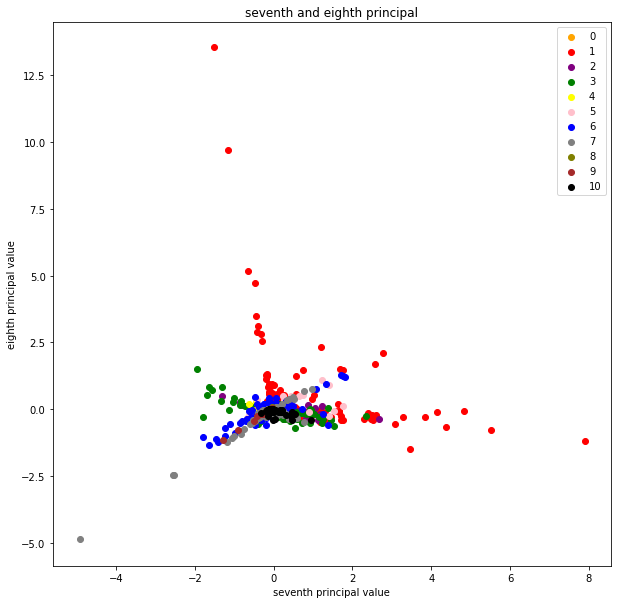

In [73]:
fig, ax = plt.subplots(figsize=(10, 10))
for key, _ in id_to_category.items():
    x = colname_df.loc[colname_df['category_id'] == key].seventh_principal
    y = colname_df.loc[colname_df['category_id'] == key].eighth_principal
    ax.scatter(x, y, label = key, color = colors_list[key])
plt.legend()
plt.title('seventh and eighth principal')
plt.xlabel('seventh principal value')
plt.ylabel('eighth principal value')
plt.show()

========================================================
<br>
從第七及第八主成分可以看出，兩個主成分能有效分出第一類(藝術及人文)的申請者
<br>
========================================================

綜上所述，可以觀察到第一類(藝術及人文)、第三類()、第六類(工程、製造及營建)、第七類(醫藥衛生及社會福利)的申請者較能代表整體資料的變異程度。也正好對應到大多數學生想要念的主流科系就是醫學相關、管理、法律及理工科系。

#### Q2.2

In [4]:
from sklearn.manifold import MDS

In [47]:
#metric MDS
mds = MDS(2, random_state = 0)
X_2d = mds.fit_transform(dep_stu2)

In [48]:
colname_df['metricMDS_dim1'] = X_2d[:, 0]
colname_df['metricMDS_dim2'] = X_2d[:, 1]

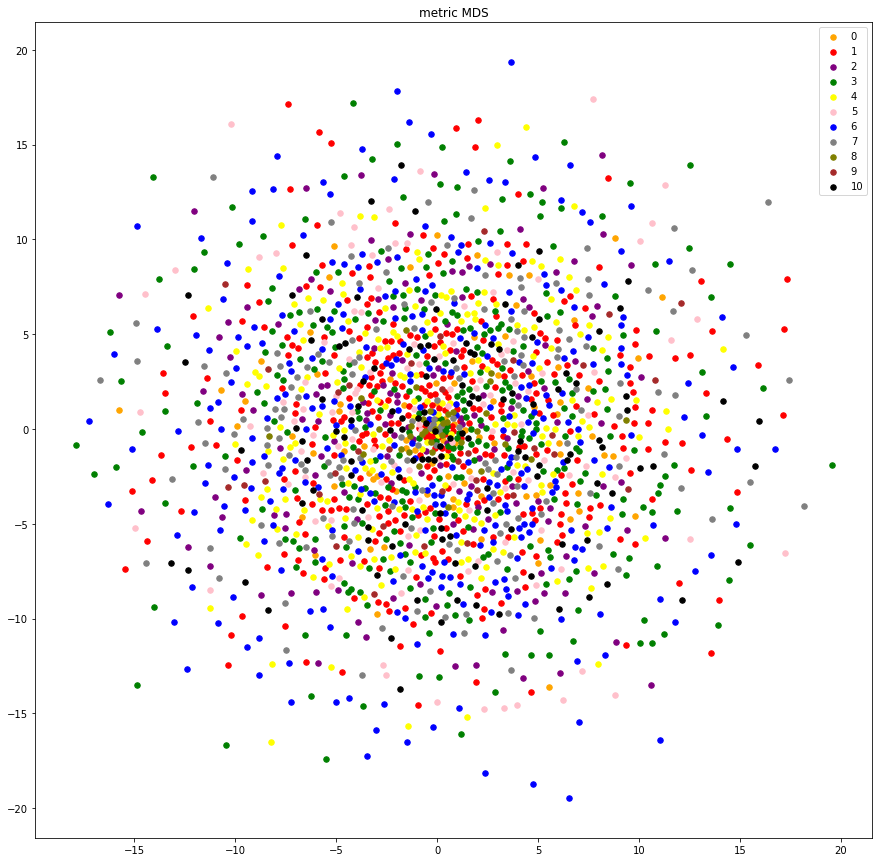

In [55]:
fig, ax = plt.subplots(figsize=(15, 15))
for key, _ in id_to_category.items():
    x = colname_df.loc[colname_df['category_id'] == key].metricMDS_dim1
    y = colname_df.loc[colname_df['category_id'] == key].metricMDS_dim2
    ax.scatter(x, y, label = key, color = colors_list[key], s = 30)
plt.legend()
plt.title('metric MDS')
plt.show()

========================================================
<br>
由上圖可以發現，metric MDS沒有辦法很有效地將資料點的category區分。
<br>
========================================================

In [50]:
#non-metric MDS
mds_non = MDS(2, random_state=0, metric = False)
X_2d_non = mds_non.fit_transform(dep_stu2)

In [51]:
colname_df['non_metricMDS_dim1'] = X_2d_non[:, 0]
colname_df['non_metricMDS_dim2'] = X_2d_non[:, 1]

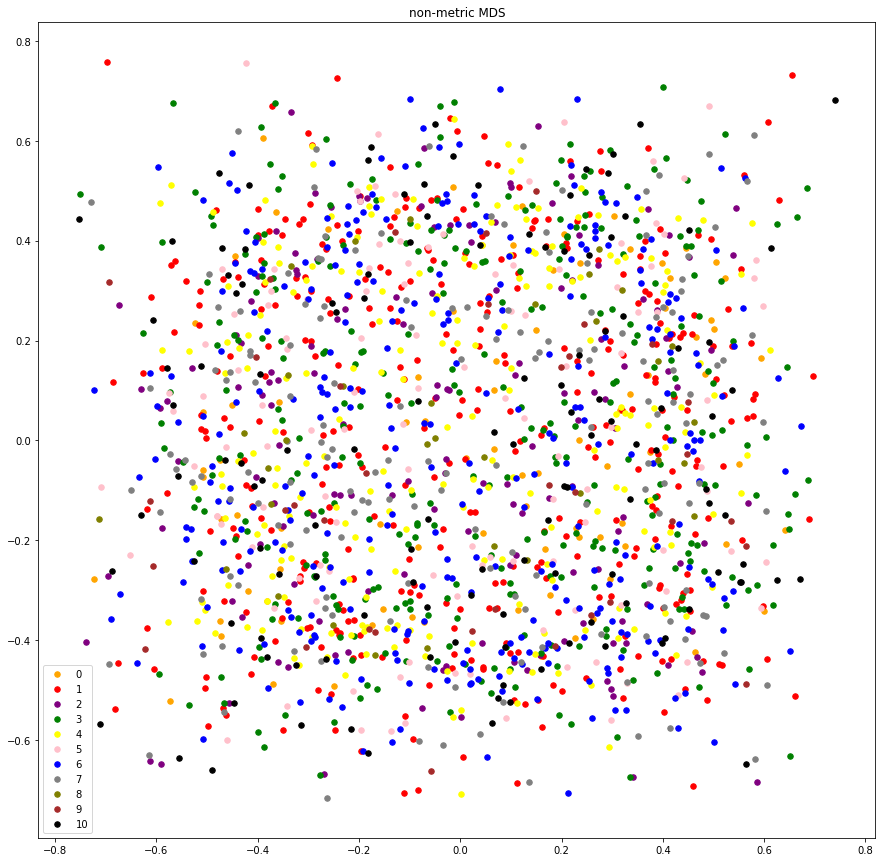

In [56]:
fig, ax = plt.subplots(figsize=(15, 15))
for key, _ in id_to_category.items():
    x = colname_df.loc[colname_df['category_id'] == key].non_metricMDS_dim1
    y = colname_df.loc[colname_df['category_id'] == key].non_metricMDS_dim2
    ax.scatter(x, y, label = key, color = colors_list[key], s = 30)
plt.legend()
plt.title('non-metric MDS')
plt.show()

========================================================
<br>
由上圖可以發現，non-metric MDS沒有辦法很有效地將資料點的category區分。
<br>
========================================================

#### Q2.3

In [10]:
from sklearn.manifold import LocallyLinearEmbedding

#### Q2.3(1) LLE with 10 neighbors

In [7]:
embedding_10 = LocallyLinearEmbedding(n_components=2, n_neighbors = 10)
X_transformed_10 = embedding_10.fit_transform(dep_stu2)

In [12]:
colname_df['LLE_10_dim1'] = X_transformed_10[:, 0]
colname_df['LLE_10_dim2'] = X_transformed_10[:, 1]

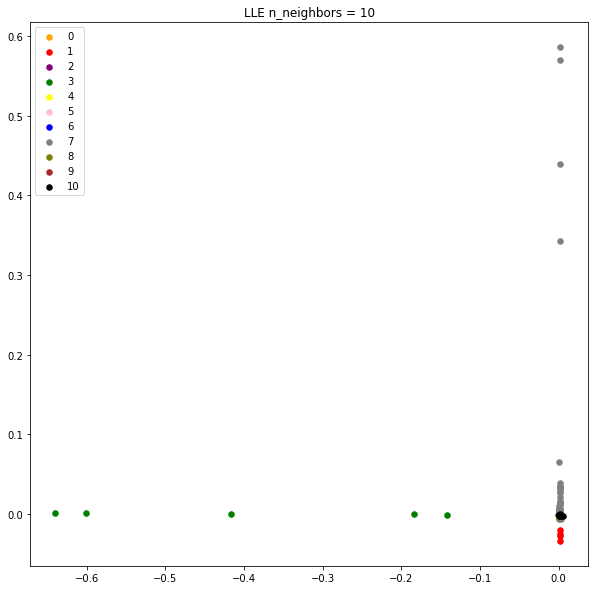

In [14]:
fig, ax = plt.subplots(figsize=(10, 10))
for key, _ in id_to_category.items():
    x = colname_df.loc[colname_df['category_id'] == key].LLE_10_dim1
    y = colname_df.loc[colname_df['category_id'] == key].LLE_10_dim2
    ax.scatter(x, y, label = key, color = colors_list[key], s = 30)
plt.legend()
plt.title('LLE n_neighbors = 10')
plt.show()

========================================================
<br>
由上圖可以發現，LLE只能將第七類的學生分類的比較好，沒有辦法很有效地將其他的category區分。
<br>
========================================================

#### Q2.3(2) LLE with 15 neighbors

In [ ]:
embedding_15 = LocallyLinearEmbedding(n_components=2, n_neighbors = 15)
X_transformed_15 = embedding_15.fit_transform(dep_stu2)

## 用colab和電腦都跑不出來，放棄。

#### Q2.3(3) PCA + LLE with 10 neighbors

In [7]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [10]:
n_components = 100
random_state = 9527
pca = PCA(n_components = n_components,random_state = random_state)
#(1917, 8)
X_100 = pca.fit_transform(dep_stu2)

In [16]:
embedding_PCA_10 = LocallyLinearEmbedding(n_components=2, n_neighbors = 10)
X_PAC_10 = embedding_PCA_10.fit_transform(X_100)

In [17]:
colname_df['LLE_PCA_10_dim1'] = X_PAC_10[:, 0]
colname_df['LLE_PCA_10_dim2'] = X_PAC_10[:, 1]

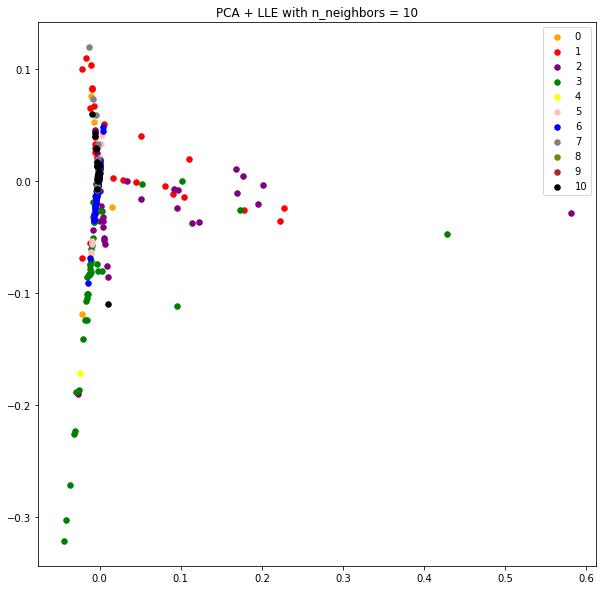

In [19]:
fig, ax = plt.subplots(figsize=(10, 10))
for key, _ in id_to_category.items():
    x = colname_df.loc[colname_df['category_id'] == key].LLE_PCA_10_dim1
    y = colname_df.loc[colname_df['category_id'] == key].LLE_PCA_10_dim2
    ax.scatter(x, y, label = key, color = colors_list[key], s = 30)
plt.legend()
plt.title('PCA + LLE with n_neighbors = 10')
plt.show()

========================================================
<br>
由上圖可以發現，即使使用PCA前處理過資料，LLE仍沒有辦法很有效地將資料點的category區分。
<br>
========================================================

#### Q2.4 KernelPCA

In [12]:
from sklearn.decomposition import KernelPCA

In [13]:
KernelPCA_rbf = KernelPCA(n_components = 2, kernel = "rbf")
X_PCA_rbf = KernelPCA_rbf.fit_transform(dep_stu2)

In [22]:
colname_df['KerPCA_rbf_dim1'] = X_PCA_rbf[:, 0]
colname_df['KerPCA_rbf_dim2'] = X_PCA_rbf[:, 1]

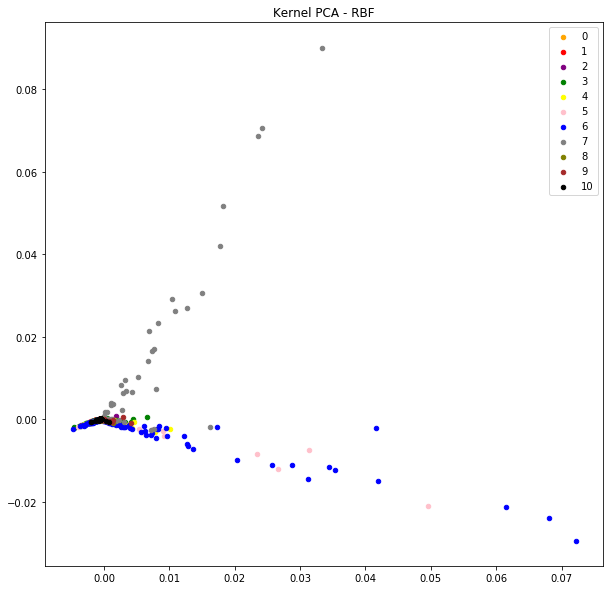

In [65]:
fig, ax = plt.subplots(figsize=(10, 10))
for key, _ in id_to_category.items():
    x = colname_df.loc[colname_df['category_id'] == key].KerPCA_rbf_dim1
    y = colname_df.loc[colname_df['category_id'] == key].KerPCA_rbf_dim2
    ax.scatter(x, y, label = key, color = colors_list[key], s = 20)
plt.legend()
plt.title('Kernel PCA - RBF')
plt.show()

========================================================
<br>
由上圖可以發現，RBF kernel PCA能夠將分出第六類(工程、製造及營建)及第七類(醫藥衛生及社會福利)的申請者。其結果和一般的PCA結果差不多，代表此數據集應該是線性可分的。
<br>
========================================================

In [14]:
KernelPCA_cosine = KernelPCA(n_components = 2, kernel = "cosine")
X_PCA_cosine = KernelPCA_cosine.fit_transform(dep_stu2)

In [24]:
colname_df['KerPCA_cosine_dim1'] = X_PCA_cosine[:, 0]
colname_df['KerPCA_cosine_dim2'] = X_PCA_cosine[:, 1]

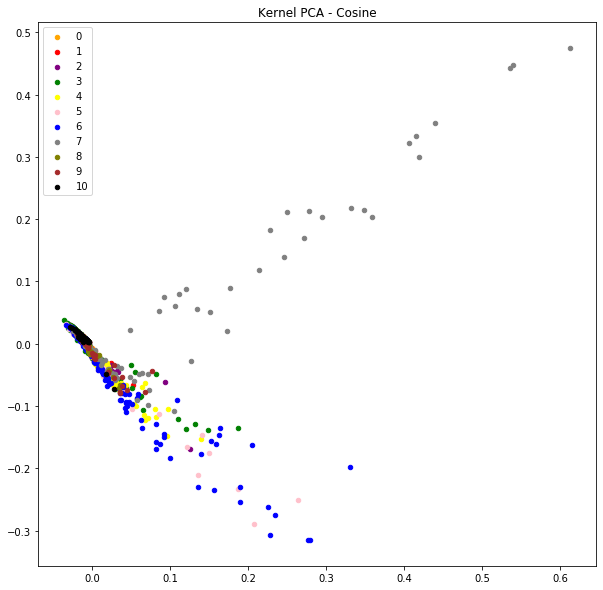

In [64]:
fig, ax = plt.subplots(figsize=(10, 10))
for key, _ in id_to_category.items():
    x = colname_df.loc[colname_df['category_id'] == key].KerPCA_cosine_dim1
    y = colname_df.loc[colname_df['category_id'] == key].KerPCA_cosine_dim2
    ax.scatter(x, y, label = key, color = colors_list[key], s = 20)
plt.legend()
plt.title('Kernel PCA - Cosine')
plt.show()

========================================================
<br>
由上圖可以發現，cosine kernel PCA能夠將分出第六類(工程、製造及營建)及第七類(醫藥衛生及社會福利)的申請者，但結果比RBF kernel PCA更差。總體來說，其結果和一般的PCA結果差不多，代表此數據集應該是線性可分的。
<br>
========================================================

#### Q2.5 TSNE

In [3]:
from sklearn.manifold import TSNE

In [4]:
np.random.seed(9487)
X_TSNE_euclidean = TSNE(n_components = 2, metric = 'euclidean').fit_transform(dep_stu2)

In [5]:
colname_df['TSNE_euc_dim1'] = X_TSNE_euclidean[:, 0]
colname_df['TSNE_euc_dim2'] = X_TSNE_euclidean[:, 1]

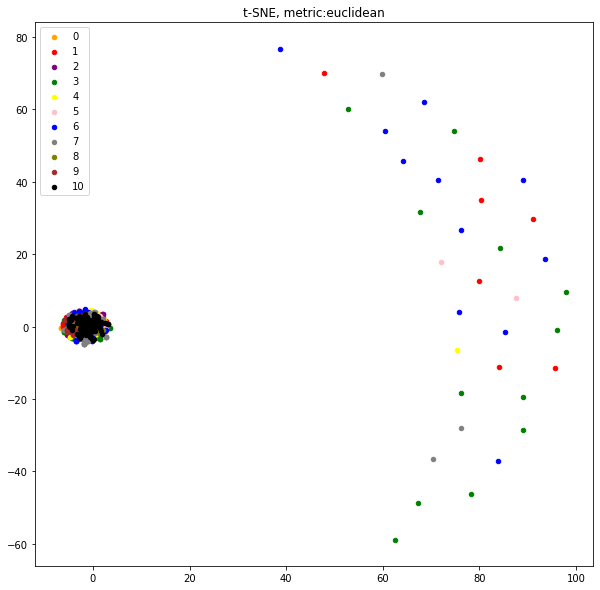

In [10]:
fig, ax = plt.subplots(figsize=(10, 10))
for key, _ in id_to_category.items():
    x = colname_df.loc[colname_df['category_id'] == key].TSNE_euc_dim1
    y = colname_df.loc[colname_df['category_id'] == key].TSNE_euc_dim2
    ax.scatter(x, y, label = key, color = colors_list[key], s = 20)
plt.legend(loc = 'upper left')
plt.title('t-SNE, metric:euclidean')
plt.show()

========================================================
<br>
由上圖可以發現，使用euclidean計算距離的t-SNE沒有辦法很有效地將資料點的category區分。
<br>
========================================================

In [11]:
np.random.seed(9487)
X_TSNE_cosine = TSNE(n_components = 2, metric = 'cosine').fit_transform(dep_stu2)

In [12]:
colname_df['TSNE_cos_dim1'] = X_TSNE_cosine[:, 0]
colname_df['TSNE_cos_dim2'] = X_TSNE_cosine[:, 1]

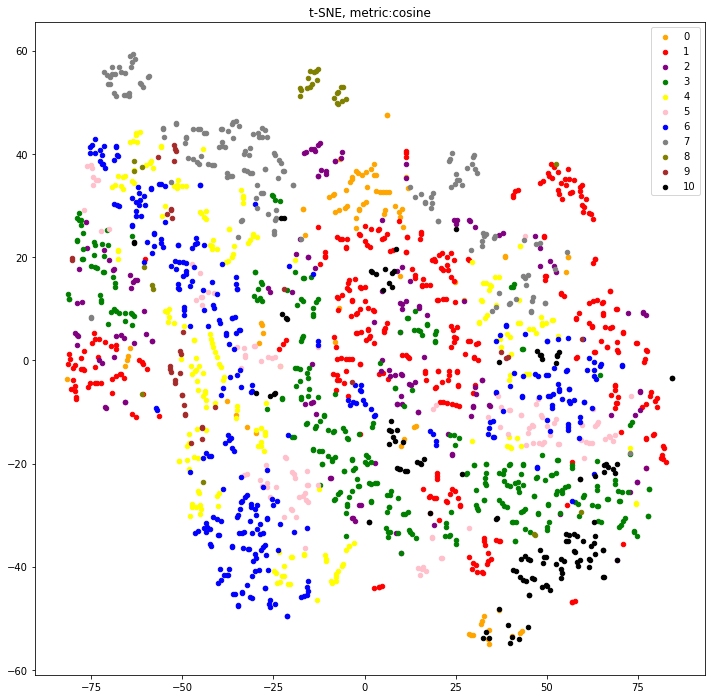

In [19]:
fig, ax = plt.subplots(figsize=(12, 12))
for key, _ in id_to_category.items():
    x = colname_df.loc[colname_df['category_id'] == key].TSNE_cos_dim1
    y = colname_df.loc[colname_df['category_id'] == key].TSNE_cos_dim2
    ax.scatter(x, y, label = key, color = colors_list[key], s = 20)
plt.legend()
plt.title('t-SNE, metric:cosine')
plt.show()

========================================================
<br>
由上圖可以發現，使用cosine計算距離的t-SNE能夠將資料點的category區分，但結果沒有到非常理想。
<br>
========================================================

In [14]:
np.random.seed(9487)
X_TSNE_jaccard = TSNE(n_components = 2, metric = 'jaccard').fit_transform(dep_stu2)

In [15]:
colname_df['TSNE_jac_dim1'] = X_TSNE_jaccard[:, 0]
colname_df['TSNE_jac_dim2'] = X_TSNE_jaccard[:, 1]

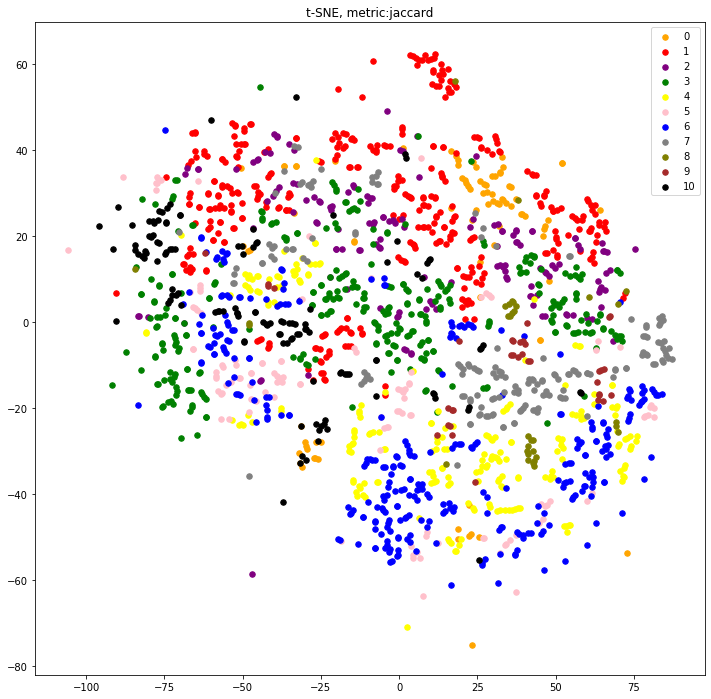

In [45]:
fig, ax = plt.subplots(figsize=(12, 12))
for key, _ in id_to_category.items():
    x = colname_df.loc[colname_df['category_id'] == key].TSNE_jac_dim1
    y = colname_df.loc[colname_df['category_id'] == key].TSNE_jac_dim2
    ax.scatter(x, y, label = key, color = colors_list[key], s = 30)
plt.legend()
plt.title('t-SNE, metric:jaccard')
plt.savefig('fig_tsne_jaccard.png')
plt.show()

========================================================
<br>
由上圖可以發現，使用jaccard計算距離的t-SNE能夠將資料點的category區分，但效果和cosine計算距離的t-SNE差不多。
<br>
========================================================

#### Q2.6

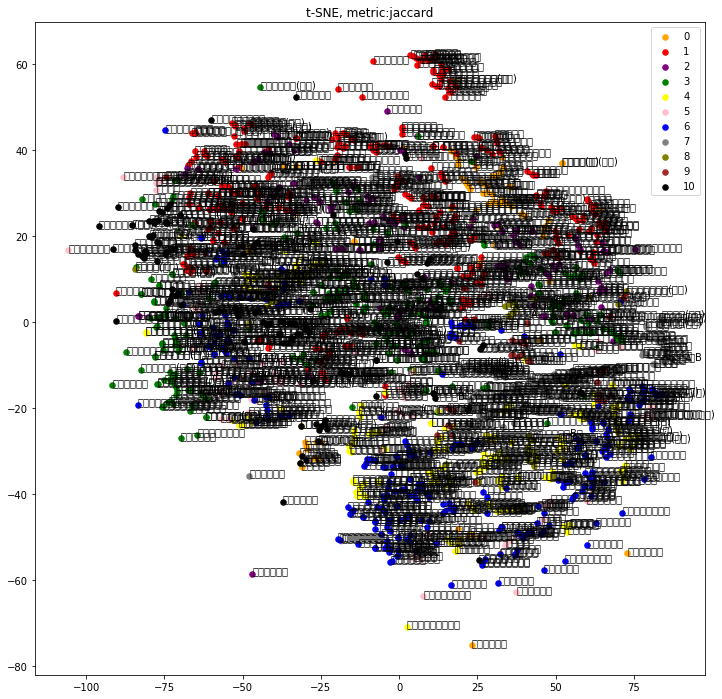

In [44]:
fig, ax = plt.subplots(figsize=(12, 12))
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']
for key, _ in id_to_category.items():
    x = colname_df.loc[colname_df['category_id'] == key].TSNE_jac_dim1
    y = colname_df.loc[colname_df['category_id'] == key].TSNE_jac_dim2
    ax.scatter(x, y, label = key, color = colors_list[key], s = 30)
    name = colname_df.loc[colname_df['category_id'] == key].depname
    for index, value in name.items():
        ax.annotate(name[index], (x[index], y[index]))
plt.legend()
plt.title('t-SNE, metric:jaccard')
plt.savefig('fig_tsne_jaccard.png')
plt.show()